<h1 style="text-align: center;">
    Parcialito 3
</h1>

<h2 style="text-align: center;">
    Teoría de Algoritmos 2
</h2>

<h2 style="text-align: center;">
    Guido Botta
</h2>

<h3 style="text-align: center;">
    Padrón 102103
</h3>

# Enunciado

**Teoría de Algoritmos II (75.30)**

**3.er Parcialito Domiciliario – 13/06/2022 - Fecha de Entrega: 15/07/2022**

*Aclaraciones*: Cada ejercicio dice al final del mismo la cantidad de puntos que otorga por hacerse completamente bien (en total, 10). Se deben obtener al menos 5 puntos para aprobar, y se deben aprobar al menos 3 de los parcialitos para aprobar/regularizar la cursada. Para la fecha de entregar, enviar un mail a [mbuchwald@fi.uba.ar ](mailto:mbuchwald@fi.uba.ar)con un pdf con la resolución, con nombre P3 - PADRON.pdf. Pueden incluir todo el material adicional que les parezca relevante (desde código hasta gráficos).

1. Se quiere convocar a una elección a la que se presentan 4 candidatos (A, B, C y D). Hay 3 votantes del jurado que tienen sus siguientes rankings individuales: 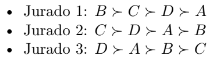

    1. ¿Quién ganaría por eliminación iterativa?
    1. ¿Quién ganaría por Borda rule?
    1. Suponé que estás a cargo de definir las reglas/formato de la votación, y sos un miembro corrupto que desea que si o si gane la alternativa A (te asegura favores si logra ganar la elección). Definir (si existe) un sistema de votación en el cual A resulte ganador de la elección. En caso de no existir, explicar por qué. ¿Cuál propiedad deseable de los sistemas de votación no se está cumpliendo si, efectivamente, ganara A?

**[1 Punto]**

2. Considerando el modelo de cascadas de información visto en clase, supongamos que hay una nueva tecnología que los individuos pueden optar por aceptar o rechazar. Supongamos que cada uno que acepta la tecnología recibe una ganancia positiva o negativa (sin conocerla a priori). Estos valores son aleatorios para cada nodo, y si la tecnología es *“Buena”*, entonces el promedio será positivo, y si la tecnología es *“Mala”* el promedio será negativo (esta información es conocida por los individuos). Quienes rechacen la tecnología reciben ganancia 0. En este modelo, cuando a un individuo le toca elegir si acepta o rechaza la nueva tecnología, recibe la información de las ganancias de todos los que vinieron antes.

    1. Supongamos que esta nueva tecnología es, en realidad, *“Mala”*. ¿Cómo afecta esta nueva información (qué ganancia tuvo cada uno de los que vinieron antes) a la potencial formación de una cascada para que persista la nueva tecnología? (No es necesario dar una demostración, simplemente argumentar)

    1. Supongamos que esta nueva tecnología es, en realidad, *“Buena”*. ¿Puede surgir una cascada de rechazo de esta nueva tecnología?

**[2 Puntos]**

3. Considerá la siguiente red, suponiendo que todos los nodos tienen inicialmente un comportamiento B. Cada nodo puede cambiar al comportamiento A si al menos la mitad de sus vecinos tiene dicho comportamiento. 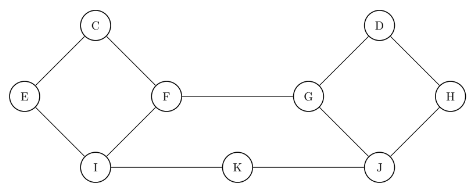

    1. Supongamos que los nodos E y F son *early adopters* del comportamiento A. Si los demás nodos siguen la regla del umbral (threshold) para adherir a este nuevo comportamiento, ¿qué nodos implementarían el comportamiento A?
    1. Explicar a qué se debe que el comportamiento Ano se propaga a través de toda la red en el escenario del punto (a). ¿Qué característica de la red lo impide? (responder a esta pregunta no apuntando a nodos particulares sino a presencias de ciertas características) ¿Dónde más tendría que haber otro *early adopter* de Así o sí para que el comportamiento se propague a través de toda la red?

**[2 Puntos]**

4. Tenemos dos grafos no dirigidos *G*1 y *G*2, con la misma cantidad de vértices y aristas. *G*1 es un grafo aleatorio de Erdös-Rényi, mientras *G*2 es un grafo que cumple la ley de potencias en la distribución de los grados. Consideremos un virus que comienza en un único vértice aleatorio y se expande según el modelo **SIR**.
    1. ¿En cuál grafo es más probable que ocurra una epidemia (i.e. se infecte al menos un 30% de la red)? Justificar brevemente la respuesta.
    1. Supongamos que en vez de comenzar en un vértice aleatorio, la epidemia comenzara en el vértice de mayor grado de *G*1 y *G*2, respectivamente. ¿En cuál de los grafos es más probable que ocurra una epidemia? Justificar brevemente la respuesta.
    1. ¿Cómo afecta la existencia (o no existencia) de comunidades en la expansión de la epidemia?

Para responder estas preguntas, se les recomienda realizar simulaciones. Pueden agregar todo tipo de resultados obtenidos para justificar sus respuestas.

**[3 Puntos]**

5. Aplicar el Algoritmo REV2 al [siguiente set de datos de reviews de productos de Amazon](https://www.kaggle.com/datasets/saurav9786/amazon-product-reviews), para detectar potenciales usuarios maliciosos y otros ciertamente honestos. Por simplificación (y unificación de criterios), considerar *γ*1 = *γ*2 = 0*.*5. Obtener aquellos usuarios cuya *justicia* (*fairness*) es menor o igual a 0.2 (son maliciosos) y tienen al menos 5 reviews, así como la proporción de nodos que son extremadamente justos: aquellos con *justicia* mayor o igual a 0.9, y con al menos 10 reviews (aristas de salida).

**[2 Puntos]**

In [28]:
# IMPORTS
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Resolución

## Ejercicio 1

1. Se quiere convocar a una elección a la que se presentan 4 candidatos (A, B, C y D). Hay 3 votantes del jurado que tienen sus siguientes rankings individuales: 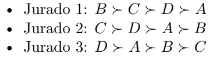

    1. ¿Quién ganaría por eliminación iterativa?
    1. ¿Quién ganaría por Borda rule?
    1. Suponé que estás a cargo de definir las reglas/formato de la votación, y sos un miembro corrupto que desea que si o si gane la alternativa A (te asegura favores si logra ganar la elección). Definir (si existe) un sistema de votación en el cual A resulte ganador de la elección. En caso de no existir, explicar por qué. ¿Cuál propiedad deseable de los sistemas de votación no se está cumpliendo si, efectivamente, ganara A?

#### Por Eliminación Iterativa

Idea:

Comparamos A con B, el ganador va contra C, el ganador contra D, y así sucesivamente.

Suponiendo que se realiza en orden A,B,C,D, funcionaría de la siguiente manera:

- Paso 1, A vs B:

    - Jurado 1: B
    - Jurado 2: A
    - Jurado 3: A
    
Gana A

- Paso 2: A vs C:

    - Jurado 1: C
    - Jurado 2: C
    - Jurado 3: A
    
Gana C

- Paso 3: C vs D:

    - Jurado 1: C
    - Jurado 2: C
    - Jurado 3: D

Gana C

Por lo tanto, el ganador sería C.

#### Por Borda Rule

Idea:

Cada votante elige su orden de preferencia y asigna n-1 a su favorito, n-2 al segundo, ..., y 0 al último. El que tenga más puntos gana.

En este caso son 4 candidatos, por lo que los puntajes irán de 3 a 0.

- Para el jurado 1:

    - A: 0
    - B: 3
    - C: 2
    - D: 1

- Para el jurado 2:

    - A: 1
    - B: 0
    - C: 3
    - D: 2
    
- Para el jurado 3:

    - A: 2
    - B: 1
    - C: 0
    - D: 3
    
Finalmente, quedaría:

- A: 0 + 1 + 2 = 3
- B: 3 + 0 + 1 = 4
- C: 2 + 3 + 0 = 5
- D: 1 + 2 + 3 = 6

Por lo tanto, ganaría D.

#### Sistema Corrupto

# COMPLETAR

## Ejercicio 2

2. Considerando el modelo de cascadas de información visto en clase, supongamos que hay una nueva tecnología que los individuos pueden optar por aceptar o rechazar. Supongamos que cada uno que acepta la tecnología recibe una ganancia positiva o negativa (sin conocerla a priori). Estos valores son aleatorios para cada nodo, y si la tecnología es *“Buena”*, entonces el promedio será positivo, y si la tecnología es *“Mala”* el promedio será negativo (esta información es conocida por los individuos). Quienes rechacen la tecnología reciben ganancia 0. En este modelo, cuando a un individuo le toca elegir si acepta o rechaza la nueva tecnología, recibe la información de las ganancias de todos los que vinieron antes.

    1. Supongamos que esta nueva tecnología es, en realidad, *“Mala”*. ¿Cómo afecta esta nueva información (qué ganancia tuvo cada uno de los que vinieron antes) a la potencial formación de una cascada para que persista la nueva tecnología? (No es necesario dar una demostración, simplemente argumentar)

    1. Supongamos que esta nueva tecnología es, en realidad, *“Buena”*. ¿Puede surgir una cascada de rechazo de esta nueva tecnología?

#### Cascadas

Se llama **contagio** a algo que se extiende por la red.

Una **cascada de información** es un fenómeno en el que un número de personas toman la misma decisión de una manera secuencial.

En este caso hay una tecnología que se puede aceptar o rechazar. Cada individuo tiene una ganancia aleatoria por aceptar la tecnología o 0 por rechazarla. La media de la ganancia es positiva o negativa dependiendo si la teconología es "buena" o "mala".

Cuando a un individuo le toca elegir si aceptar o rechazar, recibe la información de las ganancias de los que vinieron antes.

#### Caso Tecnología "Mala"

¿Cómo afecta esta nueva información (qué ganancia tuvo cada uno de los que vinieron antes) a la potencial formación de una cascada para que persista la nueva tecnología? (No es necesario dar una demostración, simplemente argumentar)

# COMPLETAR

#### Caso Tecnología "Buena"

¿Puede surgir una cascada de rechazo de esta nueva tecnología?

# COMPLETAR

## Ejercicio 3

3. Considerá la siguiente red, suponiendo que todos los nodos tienen inicialmente un comportamiento B. Cada nodo puede cambiar al comportamiento A si al menos la mitad de sus vecinos tiene dicho comportamiento. 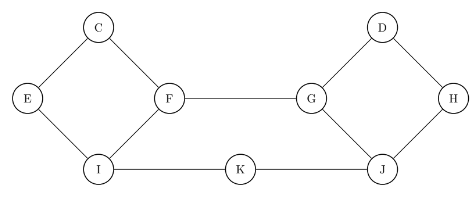

    1. Supongamos que los nodos E y F son *early adopters* del comportamiento A. Si los demás nodos siguen la regla del umbral (threshold) para adherir a este nuevo comportamiento, ¿qué nodos implementarían el comportamiento A?
    1. Explicar a qué se debe que el comportamiento A no se propaga a través de toda la red en el escenario del punto (a). ¿Qué característica de la red lo impide? (responder a esta pregunta no apuntando a nodos particulares sino a presencias de ciertas características) ¿Dónde más tendría que haber otro *early adopter* de A sí o sí para que el comportamiento se propague a través de toda la red?

#### Punto A

Toda la red tiene un comportamiento B. Cada nodo cambia a A si al menos la mitad de sus vecinos tiene dicho comportamiento.

E y F son early adopters del comportamiento A. Por lo tanto, siendo los nodos azules aquellos con comportamiento A y los verdes con comportamiento B, la red queda de la siguiente manera:

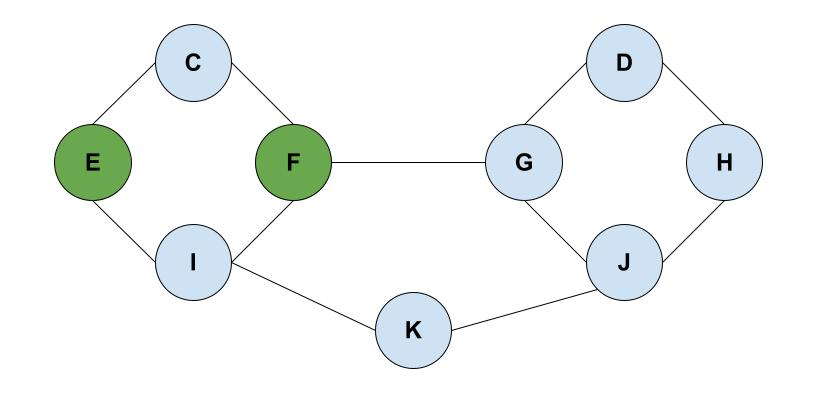

Se puede ver que C tiene ambos vecinos con comportamiento B, por lo tanto pasa a tener comportamiento B. Lo mismo ocurre con el nodo I, que tiene 2/3 de los vecinos con comportamiento B. G sigue con comportamiento A ya que tiene solo 1/3 de los vecinos con comportamiento B.

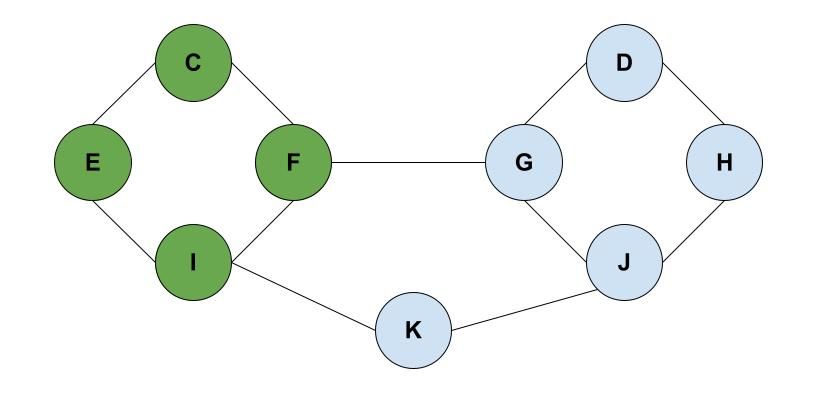

Ahora se puede observar que K tiene 1/2 de los vecinos con comportamiento B. Por lo tanto, cambiará a comportamiento B. G y el resto de los nodos continuarán con comportamiento A.

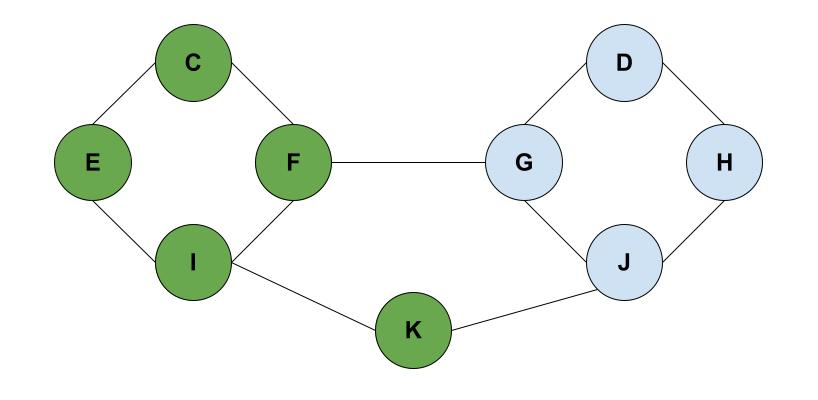

Este es el estado final de la red, ya que no hay ningún otro nodo con al menos la mitad de los nodos con comportamiento B.

#### Punto B

A qué se debe que el comportamiento A no se propaga a través de toda la red en el escenario del punto (a). ¿Qué característica de la red lo impide? ¿Dónde más tendría que haber otro early adopter de A sí o sí para que el comportamiento se propague a través de toda la red?

Este comportamiento se debe a que hay distintas comunidades en la red. En este caso hay dos comunidades: (E, C, F, I) y (G, H, J, D). C, E, D y H tienen dos aristas, mientras que F, I, G y J tienen tres aristas. Por lo tanto, para que en una comunidad se propague el comportamiento, deben tener dos early adopters y, al menos uno de esos dos, debe ser un nodo con tres aristas. Por ejemplo, en la primera comunidad:

- E y F ya fue analizado anteriormente.
- I y F, en el primer paso contagiarían a E y C.
- F y C, en el primer paso contagiarían a E y en el segundo a I.
- I y E, en el primer paso contagiarían a C y en el segundo a F.

Pero si se eligiesen a E y C, no lograrían contagiar a I y F, ya que ambos quedan con 1/3 de aristas de comportamiento B.

Es suficiente con que una comunidad cumpla con tener un early adopter de tres aristas y uno de dos y que la otra comunidad tenga al menos un early adopter. Este early adopter de la otra comunidad puede ser cualquiera de los cuatro. Por ejemplo, suponiendo el caso anteriormente analizado, donde quedaron E, C, I, F y K con el comportamiento B, si el early adopter fuera:

- G, en el primer paso se contagiaría D y J y en el segundo se contagiaría H.
- D, en el primer paso se contagiaría G y H y en el segundo se contagiaría J.
- H, en el primer paso se contagiaría D y J y en el segundo se contagiaría G.
- J, en el primer paso se contagiaría G y H y en el segundo se contagiaría D.

## Ejercicio 4

4. Tenemos dos grafos no dirigidos *G*1 y *G*2, con la misma cantidad de vértices y aristas. *G*1 es un grafo aleatorio de Erdös-Rényi, mientras *G*2 es un grafo que cumple la ley de potencias en la distribución de los grados. Consideremos un virus que comienza en un único vértice aleatorio y se expande según el modelo **SIR**.
    1. ¿En cuál grafo es más probable que ocurra una epidemia (i.e. se infecte al menos un 30% de la red)? Justificar brevemente la respuesta.
    1. Supongamos que en vez de comenzar en un vértice aleatorio, la epidemia comenzara en el vértice de mayor grado de *G*1 y *G*2, respectivamente. ¿En cuál de los grafos es más probable que ocurra una epidemia? Justificar brevemente la respuesta.
    1. ¿Cómo afecta la existencia (o no existencia) de comunidades en la expansión de la epidemia?

Para responder estas preguntas, se les recomienda realizar simulaciones. Pueden agregar todo tipo de resultados obtenidos para justificar sus respuestas.

In [26]:
# Características del grafo no-dirigido

# Nodos
N = 200

# Aristas
A = N

# Grado promedio
K = 2*A/N

print(f"El grafo tiene:\n - {N} nodos\n - {A} aristas\n - {K} grado promedio")

El grafo tiene:
 - 200 nodos
 - 200 aristas
 - 2.0 grado promedio


Nodos: 200
Aristas: 204


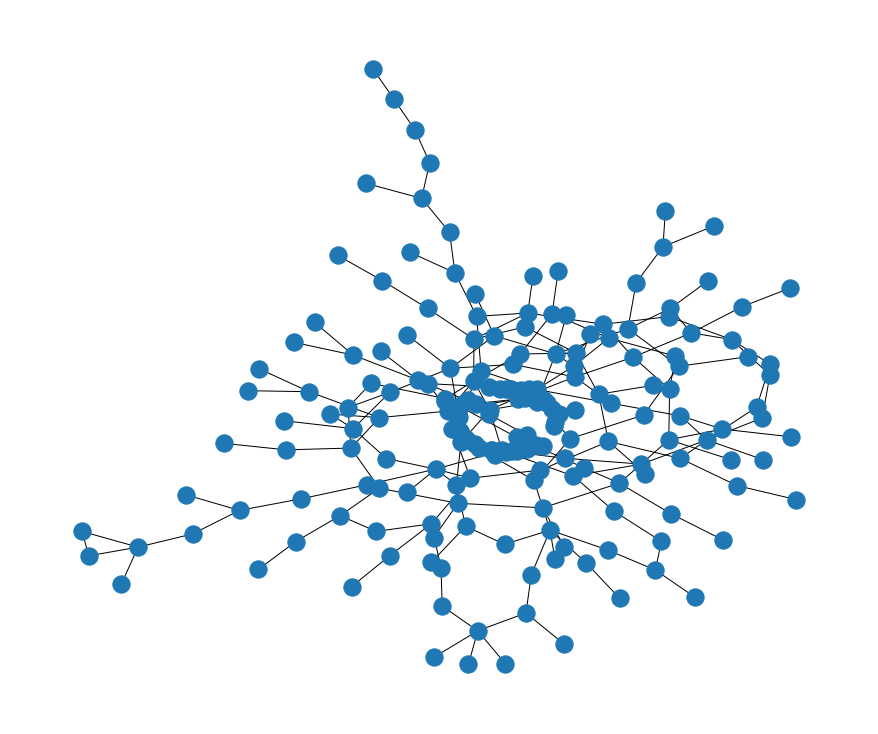

In [35]:
# G1: Erdos-Renyi

p = K / N
seed = 20160

plt.figure(figsize=(12,10))
G1 = nx.erdos_renyi_graph(N, p, seed=seed)
nx.draw_kamada_kawai(G1, with_labels=False)

print(f"Nodos: {len(G1)}")
print(f"Aristas: {len(G1.edges)}")

In [ ]:
# G2: Preferential Attachment

a = snu_metrics.alfa_preferential_attachment(grafo, 10)

plt.figure(figsize=(12,10))
preferential_attachment = snu_models.preferential_attachment(False, a, N, K)
nx.draw_kamada_kawai(preferential_attachment, with_labels=False)

## Ejercicio 5

5. Aplicar el Algoritmo REV2 al [siguiente set de datos de reviews de productos de Amazon](https://www.kaggle.com/datasets/saurav9786/amazon-product-reviews), para detectar potenciales usuarios maliciosos y otros ciertamente honestos. Por simplificación (y unificación de criterios), considerar *γ*1 = *γ*2 = 0*.*5. Obtener aquellos usuarios cuya *justicia* (*fairness*) es menor o igual a 0.2 (son maliciosos) y tienen al menos 5 reviews, así como la proporción de nodos que son extremadamente justos: aquellos con *justicia* mayor o igual a 0.9, y con al menos 10 reviews (aristas de salida).

In [6]:
import pandas as pd

df = pd.read_csv("ratings_Electronics.csv", names=["User ID", "Product ID", "Rating", "Timestamp"])
df

,User ID,Product ID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
...,...,...,...,...
7824477,A2YZI3C9MOHC0L,BT008UKTMW,5.0,1396569600
7824478,A322MDK0M89RHN,BT008UKTMW,5.0,1313366400
7824479,A1MH90R0ADMIK0,BT008UKTMW,4.0,1404172800
7824480,A10M2KEFPEQDHN,BT008UKTMW,4.0,1297555200


In [18]:
print(f"Hay {len(pd.unique(df['User ID']))} User ID únicos")
print(f"Hay {len(pd.unique(df['Product ID']))} Product ID únicos")

Hay 4201696 User ID únicos
Hay 476002 User ID únicos


#### Descripción del dataset

Reviews de productos de Amazon.

- **User ID**: Identificador único de cada usuario.
- **Product ID** : Identificador único de cada producto.
- **Rating**: Rating del correspondiente producto por el correspondiente usuario.
- **Timestamp**: Fecha del rating.

Hay 7.824.482 reviews, 4.201.696 usuarios y 476.002 productos.

#### Algoritmo REV2

- Cada usuario tiene una cierta noción de justicia (fairness) → $F(u) \in [0,1]$

- Cada producto tiene un "valor" → $G(p) \in [-1,1]$

- Los ratings tienen una fiabilidad → $R(u, p) \in [0,1]$

Inicializamos con:

$F(u)=1 ; G(p)=1 ; R(u,p)=1$

Los valores se calculan con clasificación iterativa de la siguiente manera:

$$
F(u) = \frac{\sum{R(u,p)}}{d_{out}(u)}
$$

$$
G(p) = \frac{\sum{R(u,p)} * score(u,p)}{d_{in}(p)}
$$

$$
R(u,p) = \frac{1}{\gamma_1 + \gamma_2} \left(\gamma_1 F(u) + \gamma_2 \left(1 - \frac{|score(u,p) - G(p)|}{2}\right)\right)
$$

En este caso $\gamma_1 = \gamma_2 = 0.5$